## The golden ratio

Below we plot the Golden Rectangle.  The proportions of the smaller rectangle with sides 
a and b are "golden".  What makes them golden is that proportion of the lower rectangle,
constructed with sides a+b and b, are the same.


That is,

$$
\frac{b}{a} = \frac{b+a}{b}
$$


#### Useful references 

1. [Reich's discussion of Fibonacci numbers](https://math.temple.edu/~reich/Fib/fibo.html)
2. [Mathworld Wolfram on loarithmic spirals.](https://mathworld.wolfram.com/LogarithmicSpiral.html)
3. [Wikipedia spiral page.](https://en.wikipedia.org/wiki/Spiral)   See especially for definition of polar slope angle.
4. [Wikipedia Logarithmic Spiral page.](https://en.wikipedia.org/wiki/Logarithmic_spiral)
5. [Basic differential geometry definition definition of tangential angle](https://mathworld.wolfram.com/TangentialAngle.html)

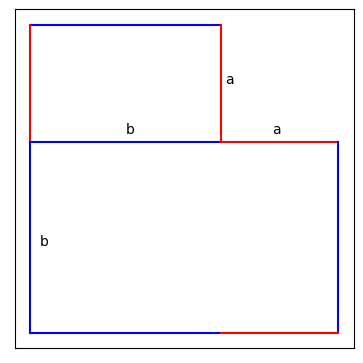

In [83]:
phi = 2* np.cos (np.pi/5)
a,b = 1,phi

fig, ax0 = plt.subplots(1,1,figsize=(4.4,4.4))

# side b lower
ax0.plot([0,b], [0,0],c="b")
#side b upper
ax0.plot([0,b], [a,a],c="b")
# side a left
ax0.plot([0,0], [0,a],c="r")
# side a right
ax0.plot([b,b], [0,a],c="r")

# Lower a extension
ax0.plot([b,b+a],[0,0],c="red")

#Lower b extensions
ax0.plot([0,0],[0,-b],c="b")
ax0.plot([b+a,b+a],[0,-b],c="b")

# Lower Parallels
# b part
ax0.plot([0,b], [-b,-b],c="b")
# a part
ax0.plot([b,b+a],[-b,-b],c="r")

ax0.set_aspect("equal")
ax0.set_xticks([],[])
ax0.set_yticks([],[])
ax0.annotate('b', xy=(b/2, .08))
ax0.annotate('b', xy=(.08, -.54*b))
ax0.annotate('a', xy=(b, a/2), xytext=(3, 0), textcoords="offset points")
_ = ax0.annotate('a', xy=(b+.4*a, .08), xytext=(3, 0), textcoords="offset points")

Letting $x$ be the proportion we seek ($x=b/a$), we can write:

$$
x = 1 + \frac{1}{x}
$$

The positive solution to the quadratic equation is

$$
x = \frac{1 + \sqrt{5}}{2}
$$

This number is the **Golden ratio**.  We compute ts value in the next cell.

In [82]:
phi = (1 + np.sqrt(5))/2
phi

1.618033988749895

## The Golden Spiral

The Fibonacci sequence is sequence of integers which has a deep connection to the golden ratio $\phi$.  We'll demonstrate that in a moment.  First here is the sequence:

In [277]:

def extend_seq (seq):
    return [seq[-1], seq[-2] + seq[-1]]

fib_seq = [1,1]

print(f"{fib_seq[-1]}",end=" ")

for i in range(20):
    print(f"{fib_seq[-1]}",end=" ")
    fib_seq = extend_seq (fib_seq)
    
print("...",end=" ")

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 ... 

Note that each term after the first `1 1` is the sum of the previous two terms.

The Fibonacci Sequence crops up in many places on nature, mathematics, and applied mathematics (of which
Computer Science is one large brranch).  Wikipedia tells us:

> Applications of Fibonacci numbers include computer algorithms such as the Fibonacci search technique and the Fibonacci heap data structure, and graphs called Fibonacci cubes used for interconnecting parallel and distributed systems. They also appear in biological settings, such as branching in trees, the arrangement of leaves on a stem, the fruit sprouts of a pineapple, the flowering of an artichoke, and the arrangement of a pine cone's bracts, though they do not occur in all species.

At the limit, the ratio of successive terms in the Fibonacci sequence is the Golden Ratio $\phi$.
We demonstrate

In [209]:
# Another way of computing phi is 2* np.cos (np.pi/5).  Explained below.
print(f"                       phi = {2* np.cos (np.pi/5)}",end="\n\n")
   

fib_seq = [1,1]
print("  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)")
print("-"*42)
for i in range(1,31):
    print(f"{i: >3d}  {fib_seq[-2]:>8d}  {fib_seq[-1]: 8d}      {fib_seq[-1]/fib_seq[-2]}")
    fib_seq = extend_seq (fib_seq)


                       phi = 1.618033988749895

  i     Fib(i-1)   Fib(i)    Fib(i)/Fib(i-1)
------------------------------------------
  1         1         1      1.0
  2         1         2      2.0
  3         2         3      1.5
  4         3         5      1.6666666666666667
  5         5         8      1.6
  6         8        13      1.625
  7        13        21      1.6153846153846154
  8        21        34      1.619047619047619
  9        34        55      1.6176470588235294
 10        55        89      1.6181818181818182
 11        89       144      1.6179775280898876
 12       144       233      1.6180555555555556
 13       233       377      1.6180257510729614
 14       377       610      1.6180371352785146
 15       610       987      1.618032786885246
 16       987      1597      1.618034447821682
 17      1597      2584      1.6180338134001253
 18      2584      4181      1.618034055727554
 19      4181      6765      1.6180339631667064
 20      6765     10946      

Computing Fibonacci

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from functools import cache


def extend_seq (seq):
    assert len(seq) >= 2, "Minimum length of seq is 2!"
    return [seq[-1], seq[-2] + seq[-1]]

def fibonacci_seq_n_iterative(n):
    """
    Classic iterative definition of fibonacci sequence.
    """
    assert n >= 0,"Use only nonnegative n"
    res=[1, 1]
    #  This works on the corner cases because
    #  list(range(-1)) and list(range(0)) are both []
    #  (the right behavior if you think about
    #  the default values for the range parameters 
    #  start and step)
    for i in range(n-1):
        res = extend_seq (res)
    return res[-1] 

@cache
def fibonacci_seq_n (n):
    """
    Classic recursive definition of fibonacci sequence.
    
    Decorator introduces caching.
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)
 

After you've used it with a large value, or while debugging, it may be a good idea to do this
because of the `@cache` decorator.

In [278]:
fibonacci_seq_n.cache_clear()

Saves memory, or while debugging it flushes possibly incorrect values.

## Other paths to $\phi$

We arrived ay $\phi$ by consideration of the what the Greeks called the Golden Rectangle.  There are other
geometric paths, including several candidates for what might be called the Golden Triangle.  Here is one.

First some code:

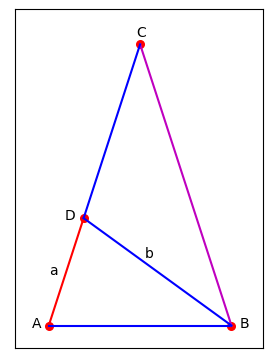

In [193]:
import numpy as no
from matplotlib import pyplot as plt


def connect (P1,P2,ax,c="b"):
    return ax.plot([P1[0],P2[0]], [P1[1],P2[1]],c=c)

def plot_point(P,ax, s=30,c="r",name=None,xytext=(-12,-1)):
    if name is not None:
        ax.annotate(name,xy=P,textcoords="offset points",xytext=xytext)
    return ax.scatter([P[0]],[P[1]],s=s,c=c)


fig, ax0 = plt.subplots(1,1,figsize=(8.8,4.4))
a= 1
b = phi
h=a+b
half_base = .5
theta = np.pi/5
two_theta = 2 * theta
A = (0,0)
B = (2*h*np.cos(two_theta), 0)
C=  (h*np.cos(two_theta),h*np.sin(two_theta))
D = (np.cos(two_theta),np.sin(two_theta))
plot_point(A,ax0,name="A")
plot_point(B,ax0,name="B",xytext=(6,-1))
plot_point(C,ax0,name="C",xytext=(-3,6))
plot_point(D,ax0,name="D",xytext=(-14,-1))
connect(A,D,ax0,c="r")
connect(A,B,ax0,c="b")
connect(B,C,ax0,c="m")
connect(B,D,ax0,c="b")
connect(D,C,ax0,c="b")
ax0.annotate("a",(np.cos(two_theta)/2, .5),textcoords="offset points",xytext=(-12,-4))
ax0.annotate("b",(1, .65),textcoords="offset points",xytext=(-12,-4))

ax0.set_aspect("equal")
ax0.set_xlim(-.3,1.9)
ax0.set_ylim(-.2,2.8)
ax0.set_xticks([],[])
_ = ax0.set_yticks([],[])

Triangle ABC is an isosceles triangle in which the angles opposite the legs are
each twice the angle opposite the base, making the angle opposite to the base $\pi/5$ radians.
The line BD has been drawn so as to bisect angle ABC.  It is easy to show, then,
that triangle ABD is an isoceles triangle similar to ABC, and that therefore 
AB = BD.  Since angle ABC is bisected, triangle BDC is also an isosceles triangle
and therefore BD = CD.  Using `a` for the length of AD and
`b` for the length of the blue line segments (AB, BD, and DC), one may then set up the following  proportion:

$$
\frac{a+b}{b} = \frac{b}{a}
$$

This means $b$  and $a$ stand in the golden ratio $\phi$.  One can then use the 
Law of Cosines to find the relation between $\cos \pi/5$ and $\phi$.  The Law of Cosines
says:

$$
\cos \theta = \frac{A^2 + B^2 - C^2}{2ab},
$$

where A and B are the sides adjacent to $\theta$ and C is the opposite side
 
We will apply the Law to angle DBA and the triangle ABD;
therefore $A=B=b$ and $C=a$.  This gives:




$$
\begin{array}{lcl}
\cos \theta &=& \frac{2b^{2} - a^{2}}{2b^{2}}\\
\cos \theta &=& 1 - \frac{a^{2}}{2b^{2}}
\end{array}
$$

We now make use of the fact that $\phi = \frac{b}{a}$, yielding

$$
(1) \cos\theta = 1 - \frac{1}{2\phi^{2}}.
$$

And normally that's where we would leave it, content with a good day's work.  But the number
$\phi$ comes with some very strange numerical properties that land it in an algebra all its
own.  This allows expressions like the one on the right hand side to be further simplified.


The following Fibonacci-like relation
is true of $\phi$ for all real values of $n$, including negative ones:

$$
(2) \, \phi^{n} = \phi^{n-2} + \phi^{n - 1}
$$

This follows directly from the defining equation for $\phi$:
$\phi$ is the $x$ such that $x = 1/x + 1$.  That is,

$$
(3)\, \phi^{1} = \phi^{-1} + \phi^{0}.
$$

For any $n$, we derive the version of (2) that has $\phi^{n}$ on the
left hand side simply by multiplying both sides of (3) by $\phi^{n-1}$.

Of particular use with the expression in (1) are these special cases of (2):

$$
\begin{array}{lclclcl}
\phi^{0} &=& \phi^{-2} + \phi^{-1} &\Rightarrow& \phi^{-2} &=& 1 - \phi^{-1}\\
\phi^{1} &=& \phi^{-1} + \phi^{0} &\Rightarrow &\phi &=& 1 + \phi^{-1}
\end{array}
$$

Hence

$$
\begin{array}{lclclcl}
\cos\theta &=& 1 - \frac{1}{2\phi^{2}}\\
           &=& 1 - \frac{\phi^{-2}}{2}\\
           &=& 1 - \frac{1 - \phi^{-1}}{2}\\
            &=& \frac{2 - 1 + \phi^{-1}}{2}\\
             &=& \frac{1 + \phi^{-1}}{2}\\
              &=& \frac{\phi}{2}\\
\end{array}
$$

Since $\theta$ is angle DBA $=\pi/5$, we have the following result, which can be verified with your friendly
neighborhood computer:

$$
\phi = 2 \cos \pi/5  = \frac{1 + \sqrt{5}}{2}
$$

It needs to be emphasized: The second equality  is an oddity.  I know of no other
way to prove the equivalence of these two very different  computations then by way
of $\phi$.  And there's more.


The diagram contains two nonsimilar iscosceles triangles
with sides that stand in the golden ratio, one with the short side
as the base (triangle ABD), and the other with the long side as the base
(triangle BDC). Using angle BDC of triangle BDC we  also find:

$$
\phi = \sqrt{\rule{0mm}{3.5mm} 2 - 2 \cos\, (3\,\pi/5)}
$$

Again, just a different name for the same number arrived at by a different zigzag hrough
the backstreets of irrational numbers.

## Exercise

Among the many peculiarities of $\phi$, then , is that in this very special case, (2), slightly modified here, tells us that taking a power of $\phi$ may be reduced to addition:


$$
 \phi^{n} = \phi^{n-1} + \phi^{n - 2}
$$


The first two functions in the cell below takes advantage of this
relation to define iterative and recursive definitions of `phi_pow(n)`.

For any non-negative integer `n`, `phi_pow_iterative(n)` and `phi_pow_recursive(n)`
return exactly the same result as $\phi^n$.  for example, for `n=12` they return

In [283]:
# phi is a name defined earlier in the notebook and which should be defoned when youi
# do this exercise.
phi**12

321.996894379985

Your assignment  is to write a function that for any $n$, returns the same value
as  `phi_pow_iterative(n)` and `phi_pow_recursive(n)` but is neither iterative nor
recursive.  Instead your function (call it `phi_pow`) should take advantage of the following
regularity:

$$
\begin{array}{lclclcrl}
\phi^1 & &                &  &                    &=& \phi\\
\phi^2& &                 &  &                    &=&  \, \phi + 1 \\
\phi^3 &=& \phi +\phi^2   &=& \phi + (\phi + 1) &=& 2\,\phi + 1\\
\phi^4 &=& \phi^2 + \phi^3 && & =& 3\,\phi + 2 &\\
\phi^5 &=& \phi^3 + \phi^4 && &= & 5\,\phi + 3 &\\
\end{array}
$$

That is, for any positive integer value of `n`, $\phi^{n}$ can be expressed in the form

$$
\phi^{n} = j\phi  + k
$$

where `j` and `k` are  positive integers depending on `n`.  For example, when `n` is 5,
`j` is 5 and `k` is 3.  The examples shown above should make it clear that when `n` is 6,
`j` is 8 and `k` is 5.

In [284]:
phi**5, 5*phi + 3

(11.090169943749476, 11.090169943749475)

In [285]:
phi**6, 8*phi + 5

(17.944271909999163, 17.94427190999916)

1. Your function `phi_pow(n)` should return the same value as  `phi_pow_iterative(n)` and `phi_pow_recursive(n)`, for any positive integer `n`, but you should at least test it for `n=1` `n=2` and `n=12`.  
2. I am going to test your function on some unknown higher value of `n`, so you won't get full credit for simply precomputing the values `i` and `j` necessary for `n=1,n=2, ... n=12`. In fact, if you do that, you won't get any credit.
3.  **Hint**  A function defined elsewhere in this notebook may be of use.

In [280]:
def phi_pow_iterative(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        #  Keep around the last two terms
        #  because you're going to add them to get
        #  the next one
        res = [1,phi]
        for i in range (n-1):
            res = [res[-1], res[-2] + res[-1]]
        return res[-1]
    
def phi_pow_recursive(n):
    """
    Iterative implementation of phi**n using the Fibonacci-like recurrence relation.
    
    phi^n = phi^{n-1}  + phi^{n-2}
    
    For example 
    
    phi**2 = 1 + phi = phi**0 + phi**1
    phi**3 = phi**2 + phi 
    phi**4 = phi**3 + phi**2
    ....
    """
    assert n >= 0,"Use only nonnegative n"
    if n == 0:
        return 1
    elif n == 1:
        return phi
    else:
        return phi_pow_recursive(n-2) + phi_pow_recursive(n-1)

def phi_pow (n):
    """
    Non-iterative implementation of phi**n using the recurrence relation
    
    phi^n = phi^{n-2}  + phi^{n-1}
    
    For example 
    
    phi**2                                   =   phi + 1
    phi**3 = phi + phi**2  = phi + (phi + 1) = 2*phi + 1
    phi**4 = phi**2 + phi**3                 = 3*phi + 2 (add the two expressions above)
    phi**5 = phi**3 + phi**4                 = 5*phi + 3 (add the two expressions above)
    ....
    phi**n = Fib_{n-1} * phi + Fib_{n-2}
    
    where Fib_i is the ith term in the Fib sequence
    """
    if n == 0:
        return 1
    elif n== 1:
        return phi
    else:
        #  Note phi_pow isnt recursive because it  doesnt call phi_pow
        #  Rather phi_pow has been reduced to a computation involving
        #  fibonacci_seq_n, which is recursive. Multiplication
        #  (taking a power)  has been reduced to addition.
        return fibonacci_seq_n(n-2) + fibonacci_seq_n(n-1)*phi

In [279]:
phi_pow_iterative(2),phi_pow_iterative(12)

(2.618033988749895, 321.99689437998484)

In [281]:
phi_pow_recursive(2),phi_pow_recursive(12)

(2.618033988749895, 321.99689437998484)

In [135]:
phi**2,phi**12

(2.618033988749895, 321.996894379985)

In [259]:
import time

m = 1_000
t1 = time.time()
#res = phi**m
res = phi_pow_iterative(m)
t2 = time.time()
print(t2-t1)
print(res)

0.0005831718444824219
9.719417773590821e+208


In [273]:
#fibonacci_seq_n.cache_clear()
t1 = time.time()
res = phi_pow (m)
t2 = time.time()
print(t2-t1)
print(res)

0.00016880035400390625
9.719417773590818e+208


## Spirals (The golden spiral)

Let's talk spirals.  You probably have a pretty good picture of what a spiral is just from
knowing the English word.  Mathematically a spiral is a generalizttion of a circle.
Points on a circle are a constant distance from the origin.  The distance of the
points on a spiral from teh origin (usually called $\rho$) 
is some function of $\theta$, teh angle from the origin.
For example, the simplest spiral is simply

$$
\rho = \theta
$$

which looks like this (in polar coordinates):

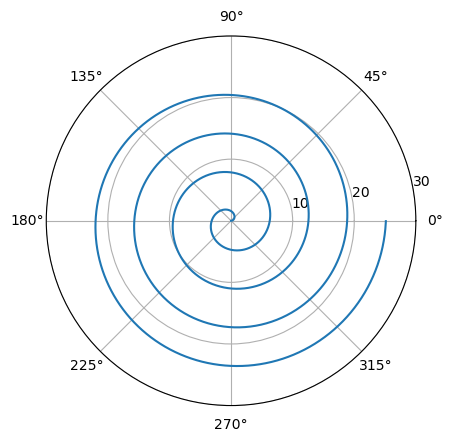

In [294]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.arange(0,8*np.pi,.01)
ax.plot(theta,theta)
ax.set_rticks([10, 20, 30])  # Less radial ticks
ax.set_rlabel_position(10)  # Move radial labels away from plotted line
ax.grid(True)

The distance between points that lie on the same ray from the origin (for example,
$\theta = 45^\circ$) is some integral multiple of $2\pi$.

Other linear functions are possible and are still spirals, such as

$$
\rho = 2\theta + 5,
$$

but our interest is in spirals where $\rho$ is a nonlinear function of 
$\theta$, in particular, where $\rho$ is an exponential function
of $\theta$.  Suchs spirals are called **exponential spirals** 
and are of the form:

$$
\rho = cb^{a\theta}
$$

For simplicity, let's let $c=1$.  Taking a full turn around the origin grows $\rho$ by a factor of $b^{2\pi}$:

$$
\rho' = b^{a\theta\,+\,2\pi} = b^{a\theta}b^{2\pi} = \rho b^{2\pi}
$$

The so-called **Golden Spiral** is a particular exponential spiral 
whose growth factor is related to $\phi$: in particular, every
right angle turn (increasing $\theta$ by $\pi/2$), should
grow $\rho$ by a factor of $\phi$.


This means we want the base of our exponential $b$ to be such that

$$
(1) \, b^{\,\pi/2} = \phi
$$

Then, for example,

$$
b^{\pi} = \phi^{2}.
$$

and

$$
b^{2\pi} = \phi^{4}.
$$

We express (1) in terms of $e$, so as to be able to compute it using the
exponential function $\exp$:

$$
(2)\,  e^{\pi/2\,(ln\, b)} = \phi
$$


Solving for $\ln \,b$

$$
\begin{array}[t]{llcl}
(3)  & \pi/2\ln \,b & = & \ln \, \phi\\
      & \ln\, b & = & \frac{2 \ln\, \phi}{\pi}\\
\end{array}
$$

Writing ${\mathbf B}$ for the constant $\ln b$, the exponential function of $\theta$ we're interested in is:

$$
\begin{array}[t]{llcl}
(4) & e^{{\mathbf B}\, \theta} &= &  e^{(2/\pi \ln\, \phi) \,\theta}\
\end{array}
$$

As desired,

$$
\begin{array}[t]{llcl}
 & e^{\,{\mathbf B}\, \pi/2} &= &  e^{\,(2/\pi \ln\, \phi) \,\pi/2}\\
                       & &=&  e^{\,\ln\, \phi}  = \phi
\end{array}
$$

Returning to the golden spiral, the equation for the golden spiral becomes:

$$
\begin{array}[t]{llcl}
(5) & \rho & = & e^{\,{\mathbf B}\, \theta}
\end{array}
$$

The slope of this equation is

$$
(6) \,\dfrac{d\rho}{d\theta} = {\mathbf B} e^{\,{\mathbf B}\, \theta} = {\mathbf B}  \rho
$$

So the ratio between the length of $\rho$ and the slope in (6) 
is ${\mathbf B}$:

$$
\frac{\dfrac{d\rho}{d\theta}}{\rho} =  {\mathbf B} = \frac{2 \ln\, \phi}{\pi}
$$

That is, despite the fact that both $\dfrac{d\rho}{d\theta}$ and $\rho$
are changing, that ratio is constant.  Note it is a feature of logarithmic
spirals in general that this ratio  is constant:

$$
\begin{array}{Llcl}
(7) & \rho & = &a e^{\,b\, \theta}\\
    & \dfrac{d\rho}{d\theta} &  = & ab e^{\,b\, \theta}\\
     &                       &  = & b \rho\\
\end{array}
$$

So  again:

$$
 \frac{\dfrac{d\rho}{d\theta}}{\rho}  = b \\
 $$


What is a tiny bit confusing here is although (5) is the equation of a logarithmic spiral
and though (6) is a slope geometrically, it is not the slope at a point on the golden spiral.
It the slope of the function in equation (5),
$\rho$ versus $\theta$, which is just an exponential curve that does not spiral at all (We show
this plot below).
    
But if (5) is just a function for an exponential curve, what
does it have to do with the golden spiral?
To draw a Cartesian plot of the golden spiral, we need to plot $x-$ and $y-$values related
to $\rho$ and $\theta$ by the usual parametric equations:

$$
\begin{array}{ll}
(8) & \begin{array}{lcl}
x = \rho * \cos(\theta)\\
y = \rho * \sin(\theta)
\end{array}   \\
& \text{ where } \\
(9) & \begin{array}{lcl}
\rho = e^{\,{\mathbf B}\, \theta}\\
\end{array}  
\end{array}
$$

What the equations in (8) tell us is that the $x$- and $y$-values are
are the projections along two orthogonal axes 
of a point at distance $\rho$ from
the axes origin, at an angle $\theta$ with the $x$-axis,
with $\rho$ and $\theta$ related as in (9).

In other words, the golden spiral is a set of points of the form

$$
\begin{array}{llcl}
(10a) & x =  e^{\,{\mathbf B}\, \theta} * \cos(\theta)\\
(10b) & y = e^{\,{\mathbf B}\, \theta} * \sin(\theta)
\end{array} 
$$

We show this plot below, as well.  One can of course take the derivative
in (8a) and (8b) using the product rule for derivatives, and then, using the chain rule,
get the "slope" at a point on the golden spiral.  
    
    
That looks like this

$$
\begin{array}{lcl}
x = e^{\,{\mathbf B}\, \theta}\, \cos \theta &\Rightarrow&\dfrac{dx}{d\theta} = 
{\mathbf B}\,e^{{\mathbf B}\theta}\cos\theta - e^{{\mathbf B}\theta} \sin\theta  \\
y =  e^{\,{\mathbf B}\, \theta} \, \sin \theta &\Rightarrow& \dfrac{dy}{d\theta} =  
{\mathbf B}\,e^{{\mathbf B}\theta}\sin\theta + e^{{\mathbf B}\theta} \cos\theta  
\end{array}
\Longrightarrow 
\begin{array}{lcl}
\dfrac{dy}{dx} & = & \frac{\dfrac{dy}{d\theta}}{\dfrac{dx}{d\theta}} = 
\frac{{\mathbf B}\,e^{{\mathbf B}\theta}\sin\theta + e^{{\mathbf B}\theta} \cos\theta   
}{{\mathbf B}\,e^{{\mathbf B}\theta}\cos\theta - e^{{\mathbf B}\theta} \sin\theta 
}
= \frac{{\mathbf B}\,\sin\theta\, + \,\cos\theta   
}{{\mathbf B}\,\cos\theta\, - \,\sin\theta 
}
\end{array}
$$

For any point $x,y$ on the golden spiral, the expression on the right
gives the slope of the spiral at $x,y$.  Unlike the slope of the exponential function in (6), 
the slope of a spiral alternates between being positive and being negative, so its
ratio to $\rho$ cannot consistently be ${\mathbf B}$, or any constant. But it does maintain a different, geometrically definable relationship to ${\mathbf B}$ that will be illustrated below.

Here are the promised plots, first the plot of logarithmic function that generates the golden
spiral, then the plot of the golden spiral.

Some plotting code in the next call.  Should be evaluated now, but does not need to be read for now.

In [6]:
# The golden spiral is a particular logarithmic spiral.
# Equation:  rho = phi**(2*theta/pi) where phi is 2 cos (pi/5)
phi = 2 * np.cos(np.pi/5)
ln_b = (2*np.log(phi))/np.pi


def old_get_dy_dx (theta):
    rho = get_rho(theta)
    ln_b_rho = ln_b * rho
    numerator = ln_b_rho * np.sin(theta) + rho * np.cos(theta)
    denominator = ln_b_rho * np.cos(theta) - rho * np.sin(theta)
    return numerator/denominator

def get_dy_dx (theta):
    #rho = get_rho(theta)
    #ln_b_rho = ln_b * rho
    numerator = ln_b * np.sin(theta) +  np.cos(theta)
    denominator = ln_b * np.cos(theta) - np.sin(theta)
    return numerator/denominator

def get_rho (theta):
    return np.exp(ln_b * theta)

def drho_dtheta (theta):
    """
    For 
    
    (1) rho = e ^{B \theta}
    
    this returns
    
    (2) dfrac{d\rho}{d\theta}  = B e ^{B theta} = B rho
    
    Note (1) is the equation of a logarithmnic spiral
    and though (2) is a slope goemetrically, it does not
    give the slope of a point on the golden spiral.
    It gives the slope of a plot of equation (1),
    rho versus theta, which is just an exponential
    curve and not the golden spiral.
    
    To plot the golden spiral, we plot x and y sequences
    
    xs = rhos * np.cos(thetas)
    ys = rhos * np.sin(thetas)
    
    where rhos is a sequence of rho-values related to
    thetas by equation (1).  The slope of 
    a point on this curve, dfrac{dy}{dx}, is a complicated function
    related to dfrac{d rho}{d theta}, dfrac{d x}{d theta},
    and dfrac{dy}{d theta} by the chain rule.
    """
    return ln_b * get_rho(theta)

def slope_line (theta0,k=200,inc=.1,verbose=False):
    """
    Simple idea not working.
    
    Get slope m and rho at theta0.  Draw line with
    slope  m through   rho * cos arctan m, rho * sin arctan m
    """
    slope, rho0 = get_derivative_and_rho (theta0,verbose=verbose)
    x0,y0 = rho0*np.cos(theta0),rho0*np.sin(theta0)
    return x0,y0,line_from_point_and_slope (x0,y0, slope)

def get_derivative_and_rho (theta0,verbose=False):
    rho0= get_rho(theta0)
    #x,y = rho0 * np.cos(theta0), rho0 * np.sin(theta0)
    slope0 = drho_dtheta (theta0)
    if verbose:
        print(f"{slope0=: >5.2f} {slope0/rho0=: >5.3f}")
    return slope0,rho0

def line_from_point_and_slope (x0,y0, slope, x_inc=5, drt="dec"):
    """
    dir is in {"inc" "dec", "both"}
    """
    #xs = np.arange(x0, x_inc, delta)
    #xs = np.linspace(x0, x0+x_inc, x_inc)
    if drt == "dec":
        xs = np.linspace(x0-x_inc, x0, x_inc)
    elif drt == "both":
        x_inc = int(x_inc//2)
        xs = np.linspace(x0-x_inc, x0+x_inc, x_inc)
    elif drt == "inc":
        xs = np.linspace(x0, x0+x_inc, x_inc)
    ys = slope *  (xs-x0) + y0
    return xs,ys
    
def percentile_point (pct,N):
    # Return an int.  Hence the use oof //
    return int(N//(1/pct))

def cos_sin_from_slope(slope):
    """
    Return cos and sin of the angle associated with slope.
    
    Here slope is the tangent of some angle.  So this
    code makes use of the trig identities:
    
    \cos \theta = 1/\sqrt(1 + \tan^2 \theta)
    \sin \theta = \tan \theta/\sqrt(1 +  \tan^2 \theta)
    
    
    
    
    """
    scnt = np.sqrt(1+slope**2)
    #cs,sn 
    return 1/scnt, slope/scnt

def format_radians_label(float_in):
    # Converts a float value in radians into a
    # string representation of that float
    #string_out = str(float_in / (np.pi))+"π"
    val= float_in/(np.pi)
    if val == 0.0:
        return "0"
    elif val == 1:
        return "$\pi$" 
    else:
        return f"{val:.2f}""$\pi$".strip('0') 

def convert_polar_xticks_to_radians(ax):
    # Converts x-tick labels from degrees to radians
    
    # Get the x-tick positions (returns in radians)
    #label_positions = ax.get_xticks()
    
    # Convert to a list since we want to change the type of the elements
    #labels = list(label_positions)
    
    # Format each label (edit this function however you'd like)
    #labels = [format_radians_label(label) for label in ax.get_xticks()]
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels([format_radians_label(label) for label in ax.get_xticks()])


The next plot shows the logarithmic function, simply doing a Cartesian plot of
$\rho$ versus $\theta$.   Since we plot $\rho$ values on the "y" axis versus
$\theta$-values on the "x" axis, no coordinate transformation is needed.
The slopes of the function at three points are shown in red and the ratios
of the slopes to $\rho$ are printed out.  As expected, they are equal to ${\mathbf B}$,
which is about .306.

In [7]:
ln_b

0.30634896253003313

slope0= 1.02 slope0/rho0=0.306
slope0=11.35 slope0/rho0=0.306
slope0=23.31 slope0/rho0=0.306


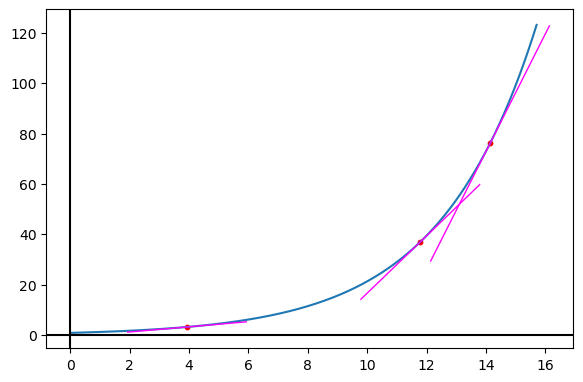

In [8]:
fac,delta = 5,.01
theta = np.arange(0,fac*np.pi+delta,delta)
theta_phi = ln_b * theta
rho = get_rho(theta)

fig, ax0 = plt.subplots(1,1,figsize=(6.8,4.4))

ax0.plot(theta,rho)

idx1 = len(theta)//2
rho1,theta1 = rho[idx1],theta[idx1]
#ax0.plot([0,rho1*np.cos(theta1)], [0, rho1*np.sin(theta1)],c="y")

# Add slope lines 
#xs2,ys2 = slope_line (theta1)

#x0,y0, (xs2,ys2) = slope_line (theta1)
N = len(theta)
percentiles = [.25,.75,.9]
drt,vbs = "both", True

thetas = [theta[idxx] for idxx in [percentile_point (pct, N) for pct in percentiles]]
for theta, slope, rho in [(thetaxx,) + get_derivative_and_rho(thetaxx,verbose=vbs) for thetaxx in thetas]:
    ax0.scatter([theta],[rho],s=10, c="r")
    thetas2,rhos2 = line_from_point_and_slope (theta,rho, slope,drt=drt,x_inc=4)
    ax0.plot(thetas2,rhos2,c="magenta",linewidth=1)

ax0.axhline(c="k")
_ = ax0.axvline(c="k")

In the plot below we plot the golden spiral using xy- or Cartesian coordinates,
transforming $\rho$ and
$\theta$ values into $x$ and $y$ values.  In the code,
this is done in lines 65 and 66.

For three particular value of $\theta$, we show the 
Cartesian slope as a short line in magenta.  That slope has three
different values, as shown in the printout above the plot.
We also draw a lines  perpendicular to each $\rho$ in
black.  The angle between the magenta line and the black
is called the **polar slope angle**, or simply, $\alpha$.
The printout shows that $\alpha$ is the same for all
three points.   More striking still, the tangent of $\alpha$
is ${\mathbf B}$, the ratio between the slope of the exponential
curve and $\rho$ which we identified above by finding the slope of the exponential
function.  We see that ${\mathbf B}$
has a very specific geometric meaning for the spiral. It is the tangent of the angle $\alpha$,
the angle between the slope of the spiral and a line perpendicular to $\rho$.

The polar slope angle $\alpha$ is a standard tool for analyzing spirals; 
it measures how much the slope of the curve at a point differs from
the slope of a circle that passes through the same point.
You can think of  circle tangent line as a providing a moveable
baseline we can use to measure the curviness of the spiral.

cartesian_slope= 0.012 alpha= 0.297 np.tan(alpha)=0.306
cartesian_slope=-0.698 alpha= 0.297 np.tan(alpha)=0.306
cartesian_slope= 0.761 alpha= 0.297 np.tan(alpha)=0.306


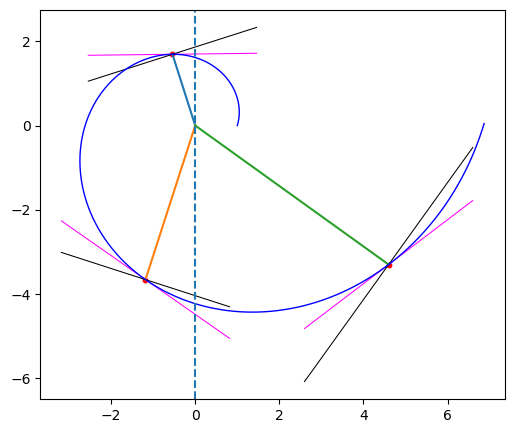

In [10]:
# The next line sets up plotting theta up to 10pi with points separated by .01
#fac,delta = 10,.01
#fac,delta = 5,.01
fac,delta = 2,.01
theta = np.arange(0,fac*np.pi+delta,delta)
rho = get_rho(theta)

# Plot axes
fig, ax0 = plt.subplots(1,1,figsize=(6,6))


#idx = percentile_point(.45,len(theta))
#rho1,theta1 = rho[idx],theta[idx]
#x1,y1 = rho1*np.cos(theta1), rho1*np.sin(theta1)
#ax0.plot([0,x1], [0, rho1*np.sin(theta1)])

##  The circle at rho1,theta
#circ_x = rho1 * np.cos(theta)
#circ_y = rho1 * np.sin(theta)
#ax0.plot(circ_x,circ_y)
## End the circle at rho0


# Add slope line

#x0,y0, (xs2,ys2) = slope_line (theta1)
drt="both"
#xy_slope = get_dy_dx (theta1)

#xs2,ys2 = line_from_point_and_slope (x1,y1, xy_slope,drt=drt,x_inc=6)

#xs = np.arange(x0, 50, .1)
#ys = slope *  (xs-x0) + y0
#ax0.plot(xs2,ys2,c="r",linewidth=.5)
#ax0.scatter([x1],[y1],s=10, c="r")

N = len(theta)
percentiles = [.3,.7,.9]
#percentiles = [.25,.75]
drt,vbs = "both", True

theta_rhos = [(theta[idxx],rho[idxx]) for idxx in [percentile_point (pct, N) for pct in percentiles]]
for theta1,rho1 in theta_rhos:
    x1,y1 = rho1*np.cos(theta1), rho1*np.sin(theta1)
    ax0.scatter([x1],[y1],s=10, c="r")
    ax0.plot([0,x1], [0, rho1*np.sin(theta1)])
    # Slope of the golden spiral at theta1
    cartesian_slope = get_dy_dx (theta1)
    # Slope angle
    tangent_angle = np.arctan(cartesian_slope) 
    # angle perpendicular to theta1
    perp_angle = theta1 + np.pi/2
    perp_slope = np.tan(perp_angle)
    dr_dth = drho_dtheta (theta1)
    # tangent has a period of pi
    alpha = (perp_angle  - tangent_angle)%(np.pi)
    #print(f"{perp_slope=:.3f} {-1/np.tan(theta1):.3f}")
    print(f"{cartesian_slope=: 6.3f} {alpha=: 6.3f} {np.tan(alpha)=:.3f}")
    xs2,ys2 = line_from_point_and_slope (x1,y1, cartesian_slope,drt=drt,x_inc=4)
    xs3,ys3 = line_from_point_and_slope (x1,y1, perp_slope,drt=drt,x_inc=4)
    #thetas2,rhos2 = line_from_point_and_slope (thetazz,rhozz, slope,drt=drt,x_inc=4)
    #thetas2,rhos2 = line_from_point_and_slope (x,y, slope,drt=drt,x_inc=5)
    ax0.plot(xs2,ys2,c="magenta",linewidth=.75)
    ax0.plot(xs3,ys3,c="black",linewidth=.75)


##  The golden spiral
x = rho * np.cos(theta)
y = rho * np.sin(theta)
# Draw GS
ax0.plot(x,y,c="b",linewidth=1)
## End the golden spiral

#_ = ax0.axhline()
_ = ax0.axvline(linestyle="--")
ax0.axes.set_aspect('equal')

A bigger slice of spiral

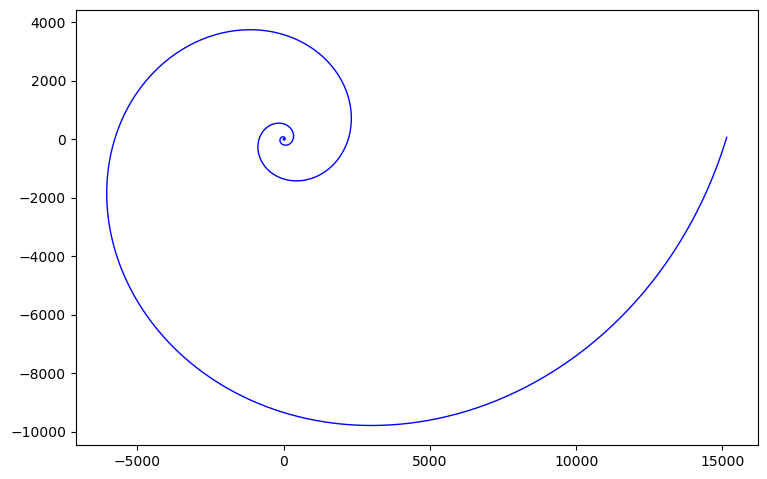

In [208]:
# The next line sets up plotting theta up to 10pi with points separated by .01
fac,delta = 10,.01
theta = np.arange(0,fac*np.pi+delta,delta)
rho = get_rho(theta)

# Plot axes
fig, ax0 = plt.subplots(1,1,figsize=(8.8,6))


##  The golden spiral
x = rho * np.cos(theta)
y = rho * np.sin(theta)
# Draw GS
ax0.plot(x,y,c="b",linewidth=1)
## End the golden spiral
ax0.set_aspect("equal")
#_ = ax0.axhline()

It is instructive to work through the proof that $\tan \alpha = \mathbf B$.

The sketch is as follows:

1.  $\alpha = \theta + \pi/2 - \arctan\left(\dfrac{dy}{dx}\right ) $
2.  Apply the trigonometric identity for the tangent of the difference of two angles:
    
    $$
    \tan (\alpha - \beta) = \frac{\tan \alpha - \tan \beta}{1 + \tan \alpha \tan \beta}
    $$
    
    This gives
    
    $$
    \begin{array}{lcl}
    \tan \alpha = \tan \left ( \theta + \pi/2 - \arctan\left(\dfrac{dy}{dx}\right ) \right)& = & 
    \begin{array}{c}
    \tan (\pi/2 + \theta) - \tan (\arctan \frac{dy}{dx})\\
    \hline
    1 + \tan(\pi/2 + \theta)\tan (\arctan \frac{dy}{dx})
    \end{array} \\
    & = & 
    \begin{array}{c}
    \tan (\pi/2 + \theta) - \frac{dy}{dx}\\
    \hline
    1 + \tan(\pi/2 + \theta)\frac{dy}{dx}
    \end{array} \\
%     & = & \frac{\tan (\pi/2 + \theta) -  \frac{dy}{dx}}{1 + \tan(\pi/2 + \theta)\frac{dy}{dx}}\\
     & = & 
    \begin{array}{c}
    - \cot \theta - \frac{dy}{dx}\\
    \hline
    1 + (- \cot \theta)\frac{dy}{dx}
    \end{array}   =  \begin{array}{c}
    - \cot \theta - \frac{dy}{dx}\\
    \hline
    1 - \cot \theta \frac{dy}{dx}
    \end{array}  \\    
    %  & = &     \frac{-\cot \theta \, - \, \frac{dy}{dx}}{1 + \left (-\cot \theta \frac{dy}{dx} \right )}
    %            =   \frac{-\cot \theta \, - \, \frac{dy}{dx}}{1 - \,\cot \theta \frac{dy}{dx} }           \\
    \end{array}
    $$
    
3. Substituting in the value for $\dfrac{dy}{dx}$ we computed above and the definition of cotangent,
    we have:
    
    $$
    \begin{array}{lcl}
    \tan \alpha & = & 
    \begin{array}{c}
    \frac{-\cos\theta}{\sin\theta} - \frac{B \sin\theta\, +\,\cos\theta}{B \cos\theta \,-\, \sin\theta}\\
    \hline
    1 \,-\, \left(\frac{\cos\theta}{\sin\theta}\right )\left (\frac{B \sin\theta\, +\,\cos\theta}{B \cos\theta \,-\, \sin\theta}\right )
    \end{array} =
    \begin{array}{c}
    \frac{-(B\cos\theta -\sin\theta)(\cos\theta) - (\sin\theta)(B\sin\theta + \cos\theta)}{%
    \sin\theta(B\cos\theta - \sin\theta)}\\
    \hline
    \frac{\sin\theta(B\cos\theta - \sin\theta) - \cos\theta (B\sin\theta + \cos\theta}{%
    \sin\theta(B\cos\theta - \sin\theta)}
    \end{array}\\
    & = & 
    \begin{array}{c}
    -(B\cos\theta -\sin\theta)(\cos\theta) - (\sin\theta)(B\sin\theta + \cos\theta)\\
    \hline
    \sin\theta(B\cos\theta - \sin\theta) - \cos\theta (B\sin\theta + \cos\theta)
    \end{array}\\
    &=& \begin{array}{c}
    -B\cos^{2}\theta + \sin\theta\cos\theta - B\sin^{2}\theta - \sin\theta\cos\theta\\
    \hline
    B\cos\theta\sin\theta - \sin^{2}\theta  - B\cos\theta \sin\theta - \cos^{2}\theta
    \end{array}\\
    &=& \begin{array}{c}
    -B\,(\cos^{2}\theta  + \sin^{2}\theta) \\
    \hline
     - \sin^{2}\theta  - \cos^{2}\theta
    \end{array} = 
    \begin{array}{c}
    -B\\
    \hline
     - 1
    \end{array}  = B \\
    \end{array}
    $$

Finally we plot the spiral again using a polar plot. As in the plot of the exponential function,
no coordinate transformation
is needed, but this time it is because we have switched to a coordinate system which 
gives $\rho$ and $\theta$ their intended geometric interpretations.  In reality, the transformation is being done for us before the points are plotted on the axes.  

This is not something we need to think about
unless we want to perform some operation such as taking a derivative of the function.
Then we need to bear in mind that in order to apply the operation to the function
we are seeing (a spiral), we need to apply it to the transformed version of $e^{{\mathbf B} \theta}$,
not directly to $e^{{\mathbf B} \theta}$.

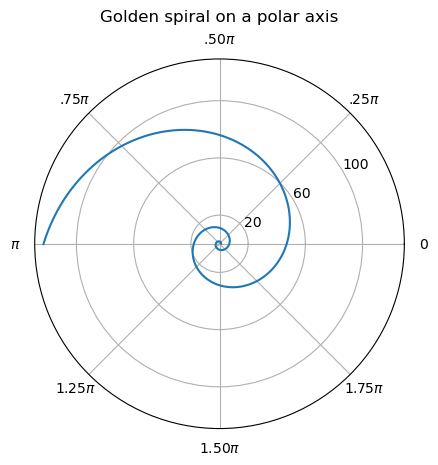

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fac,delta = 5,.01
theta = np.arange(0,fac*np.pi+delta,delta)
rho = get_rho(theta)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, rho)
#ax.set_rmax(2)
ax.set_rticks([20, 60, 100])  # Less radial ticks
ax.set_rlabel_position(30.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("Golden spiral on a polar axis", va='bottom')
convert_polar_xticks_to_radians(ax)

Polar plots take some getting used to.
For example, the labeling makes it appear that 
$\rho=60,\theta = \pi/4$ is close to a point on the curve.  In fact,
it is not.  But $\rho=60,\theta=17\pi/4$ is; that happens to fall
on the $\pi/4$ radial as well because $17\pi/4$ is exactly
$4\pi$ more than $\pi/4$.  So exact values of $\theta$ are not
represented in this plot, only values of $\theta$ mod $2\pi$.

Spelling this out:

The $\rho$ value associated with $\pi/4$ is nowhere near 60 for our curve.

In [12]:
get_rho(np.pi/4)

1.272019649514069

Thus this point shows up on the plot as a point very near the origin.

However the $\rho$-value for $17\pi/4$ is pretty close to 60.

In [13]:
get_rho(17*np.pi/4)

59.75784701638423

The number $\pi/4$ for our computer.

In [15]:
np.pi/4

0.7853981633974483

The number $17\pi/4$:

In [16]:
(17* np.pi/4)

13.351768777756622

$17\pi/4$ mod $2\pi$  (the remainder when $17\pi/4$ is divided by $2\pi$).

This tells you what radial the angle 13.351768777756622 will show up on.

In [18]:
(17* np.pi/4)%(2*np.pi)

0.7853981633974492